# EEG Imaginary data classification

EDA of EEG data classification with deep neural networks.

Dataset source: https://physionet.org/content/eegmmidb/1.0.0/

In order to get the dataset, we will use wget to download dataset to current directory

In [ ]:
!wget -r -N -c -np https://physionet.org/files/eegmmidb/1.0.0/

This will create a folder named `physionet.org` folder with all the eeg data in it.
Lets see the folder stracture with `tree` command

In [3]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tree


In [25]:
!sudo tree physionet.org/ --filelimit=400 -L 20 | head -n 40

physionet.org/
├── files
│   └── eegmmidb
│       └── 1.0.0
│           ├── 64_channel_sharbrough-old.png
│           ├── 64_channel_sharbrough.pdf
│           ├── 64_channel_sharbrough.png
│           ├── ANNOTATORS
│           ├── RECORDS
│           ├── S001
│           │   ├── S001R01.edf
│           │   ├── S001R01.edf.event
│           │   ├── S001R02.edf
│           │   ├── S001R02.edf.event
│           │   ├── S001R03.edf
│           │   ├── S001R03.edf.event
│           │   ├── S001R04.edf
│           │   ├── S001R04.edf.event
│           │   ├── S001R05.edf
│           │   ├── S001R05.edf.event
│           │   ├── S001R06.edf
│           │   ├── S001R06.edf.event
│           │   ├── S001R07.edf
│           │   ├── S001R07.edf.event
│           │   ├── S001R08.edf
│           │   ├── S001R08.edf.event
│           │   ├── S001R09.edf
│           │   ├── S001R09.edf.event
│           │   ├── S001R10.edf
│           │   ├── S001R10.edf.event
│           │   ├── S001R11.edf
│     

The files are in `edf` format, so we will need `pyedflib` library to open data.

In [26]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.0 MB/s eta 0:00:00a 0:00:01


In [48]:
import pyedflib
import numpy as np
file = "physionet.org/files/eegmmidb/1.0.0/S001/S001R05.edf"
with pyedflib.EdfReader(file) as f:
# annotations = file.readAnnotations()  
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
            sigbufs[i, :] = f.readSignal(i)
    annotations = f.readAnnotations()


In [42]:
print('Length of labels', len(signal_labels))
print('First 10 labels', signal_labels[:10])

Length of labels 64
First 10 labels ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..']


![Img](https://physionet.org/files/eegmmidb/1.0.0/64_channel_sharbrough.png)

As we see we have 64 labels, which are the channels 

Here are the annotations which are 3 arrays, 
- the first array is the time in seconds when the signal was captured
- the second array is the interval between that current and prevoius signal
- the thirs array is the events happened for each signal interval

In [58]:
annotations

(array([  0. ,   4.2,   8.3,  12.5,  16.6,  20.8,  24.9,  29.1,  33.2,
         37.4,  41.5,  45.7,  49.8,  54. ,  58.1,  62.3,  66.4,  70.6,
         74.7,  78.9,  83. ,  87.2,  91.3,  95.5,  99.6, 103.8, 107.9,
        112.1, 116.2, 120.4]),
 array([4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2,
        4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1,
        4.2, 4.1, 4.2, 4.1]),
 array(['T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0',
        'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2',
        'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1'], dtype='<U2'))

In [51]:
sigbufs.shape

(64, 20000)

And the signal consisiting of 64 channels and about 120 seconds of experiments, each signal has sampling rate of 160 Hz, so the length of the signal is 124*160 which is close to 20000

In the scopes of this project we will be focusing on this channels of data

![Img](eda_signals.png)

In [103]:
channels = [["Fc1.", "Fc2."],
            ["Fc3.", "Fc4."],
            ["Fc5.", "Fc6."],
            ["C5.", "C6."],
            ["C3.", "C4."],
            ["C1.", "C2."],
            ["Cp1.", "Cp2."],
            ["Cp3.", "Cp4."],
            ["Cp5.", "Cp6."]]
channels

[['Fc1.', 'Fc2.'],
 ['Fc3.', 'Fc4.'],
 ['Fc5.', 'Fc6.'],
 ['C5.', 'C6.'],
 ['C3.', 'C4.'],
 ['C1.', 'C2.'],
 ['Cp1.', 'Cp2.'],
 ['Cp3.', 'Cp4.'],
 ['Cp5.', 'Cp6.']]

Lets take the `FC1` channel end explore it

In [62]:
fc1_idx = signal_labels.index('Fc1.')
fc1 = sigbufs[fc1_idx]
fc1.shape

(20000,)

In [115]:
import matplotlib.pyplot as plt

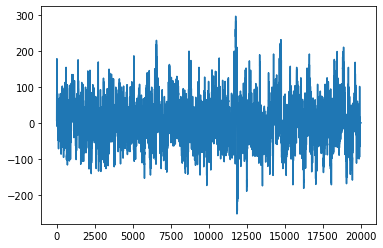

In [116]:
plt.plot(fc1)

Lets look at the signal in frequency domain

In [71]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 67.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 57.9 MB/s eta 0:00:0000:0100:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23702 sha256=860d7e7d0e42aff8ea6e8274df4312173c02083e88f70a647ed23b0d4e480fac
  Stored in directory: /root/.cache/pip/wheels/e4/76/a4/cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


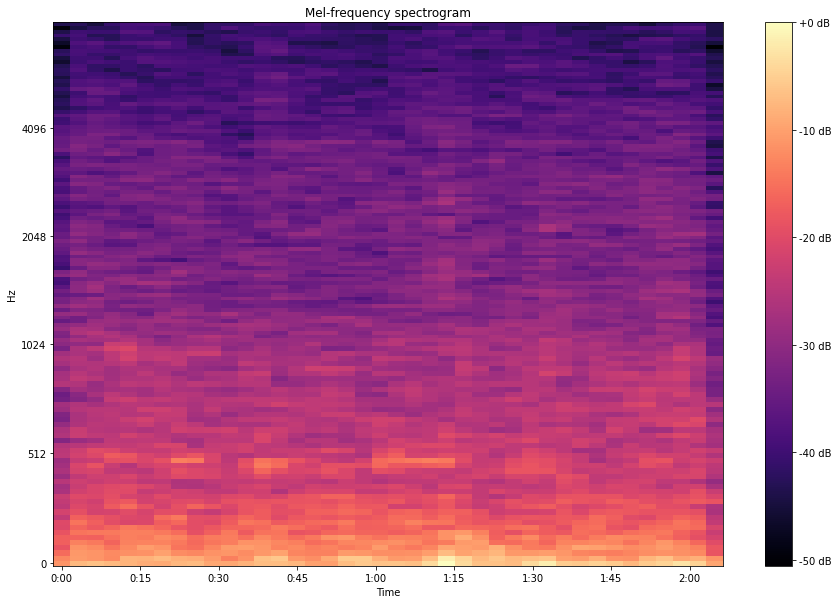

In [114]:
import librosa

sr = 160
S = librosa.feature.melspectrogram(y=fc1, sr=sr)

fig, ax = plt.subplots()

S_dB = librosa.power_to_db(S, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_figwidth(15)
fig.set_figheight(10)

ax.set(title='Mel-frequency spectrogram');